# Predicting Health Charges

#### Chris Richards
#### Practicum 1, Summer 2020
#### Regis University

### Multiple Linear Regression 
#### Complete Feature Set
The LinearRegression model found in the scikit-learn library will be used.  This model will be built using multiple features to predict the target feature, 'charges'.  
First the data will be manually split in to a test and training set.  The test set will be 30% of the data while the model will train on the other 70%.  Next the model will be fit to the training set and assessed for quality.  Next it will be validated against the test set of data.  
In order to optimize the model, cross-validation and parameter tuning will then be conducted using the GridSearchCV 

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

from sklearn import linear_model, metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.svm import SVR

import statsmodels.api as sm

In [16]:
df = pd.read_csv(r"E:\Regis\Practicum_1\df_2_all_features.csv")
df_profile = df

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   bmi               1337 non-null   float64
 2   children          1337 non-null   int64  
 3   charges           1337 non-null   float64
 4   sex_female        1337 non-null   int64  
 5   sex_male          1337 non-null   int64  
 6   smoker_no         1337 non-null   int64  
 7   smoker_yes        1337 non-null   int64  
 8   region_northeast  1337 non-null   int64  
 9   region_northwest  1337 non-null   int64  
 10  region_southeast  1337 non-null   int64  
 11  region_southwest  1337 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 125.5 KB


In [18]:
df.describe

<bound method NDFrame.describe of       age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0      19  27.900         0  16884.92400           1         0          0   
1      18  33.770         1   1725.55230           0         1          1   
2      28  33.000         3   4449.46200           0         1          1   
3      33  22.705         0  21984.47061           0         1          1   
4      32  28.880         0   3866.85520           0         1          1   
...   ...     ...       ...          ...         ...       ...        ...   
1332   50  30.970         3  10600.54830           0         1          1   
1333   18  31.920         0   2205.98080           1         0          1   
1334   18  36.850         0   1629.83350           1         0          1   
1335   21  25.800         0   2007.94500           1         0          1   
1336   61  29.070         0  29141.36030           1         0          0   

      smoker_yes  region_northeast  regio

#### Split the data into the test and train sets
The test size is set to 30% of the set.  A random seed of 1179 is set for reproducibility.  

In [19]:
#X = df.filter(items=['age', 'bmi', 'smoker_no', 'smoker_yes'])
X = df.loc[:, df.columns != 'charges'] # select all columns except for charges
y = df['charges']

In [20]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1332,50,30.970,3,0,1,1,0,0,1,0,0
1333,18,31.920,0,1,0,1,0,1,0,0,0
1334,18,36.850,0,1,0,1,0,0,0,1,0
1335,21,25.800,0,1,0,1,0,0,0,0,1


In [21]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1332    10600.54830
1333     2205.98080
1334     1629.83350
1335     2007.94500
1336    29141.36030
Name: charges, Length: 1337, dtype: float64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1179)

In [23]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
171,49,30.300,0,0,1,1,0,0,0,0,1
395,46,19.855,0,0,1,1,0,0,1,0,0
408,38,21.120,3,0,1,1,0,0,0,1,0
1238,25,42.130,1,1,0,1,0,0,0,1,0
76,29,29.590,1,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1118,30,19.950,3,1,0,1,0,0,1,0,0
914,24,33.990,0,1,0,1,0,0,0,1,0
825,56,31.790,2,0,1,0,1,0,0,1,0
928,41,34.210,1,0,1,1,0,0,0,1,0


In [24]:
y_train

171      8116.68000
395      7526.70645
408      6652.52880
1238     3238.43570
76       3947.41310
           ...     
1118     5693.43050
914      2473.33410
825     43813.86610
928      6289.75490
655      3410.32400
Name: charges, Length: 935, dtype: float64

In [25]:
X_test

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
410,19,17.480,0,0,1,1,0,0,1,0,0
1264,64,23.760,0,0,1,0,1,0,0,1,0
454,32,46.530,2,0,1,1,0,0,0,1,0
781,51,35.970,1,0,1,1,0,0,0,1,0
279,51,21.560,1,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48,60,24.530,0,1,0,1,0,0,0,1,0
631,29,35.530,0,1,0,1,0,0,0,1,0
290,28,33.400,0,1,0,1,0,0,0,0,1
368,44,32.015,2,0,1,1,0,0,1,0,0


In [26]:
y_test

410      1621.34020
1264    26926.51440
454      4686.38870
781      9386.16130
279      9855.13140
           ...     
48      12629.89670
631      3366.66970
290      3172.01800
368      8116.26885
581      6356.27070
Name: charges, Length: 402, dtype: float64

Checking the splitting of the data looks correct.  The indexes for the data in each set matches up.  
  
  ### Linear Regression Model
  
A linear regression model will be created and analyzed using the scikit-learn library.  

Create the regression model object.

In [27]:
l_reg = linear_model.LinearRegression()

#### Fit the model to the training set

In [28]:
l_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Validate the model by predicting on the test set.

In [29]:
l_reg_pred = l_reg.predict(X_test)

Get the accuracy score from the model.

In [30]:
l_reg.score(X_test, y_test)

0.7367494401257538

Accuracy of the model is 73.67%.  

Get the coefficients of the model.

In [31]:
print('Coefficients: \n', l_reg.coef_)

Coefficients: 
 [   266.23238314    374.60956415    536.89800336    164.53971668
   -164.53971668 -11621.59265107  11621.59265107    746.90197706
    398.37881847   -793.4818672    -351.79892833]


Alternatively, the accuracy score can be found using the 'r2_score' method of scikit-learn's 'metrics' library.

In [32]:
metrics.r2_score(y_test,l_reg_pred)

0.7367494401257538

Again, the accuracy is found to be 73.67%.

#### Plot the residual errors

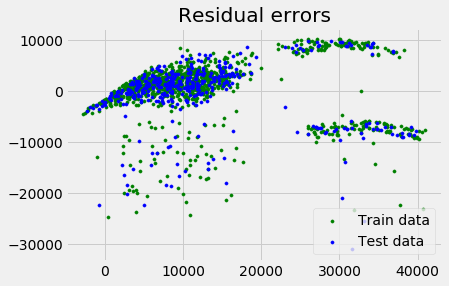

In [33]:
plt.style.use('fivethirtyeight')

#training data
plt.scatter(l_reg.predict(X_train), 
            l_reg.predict(X_train) - y_train,
            color = "green", 
            s = 10, 
            label = 'Train data'
           )
#test data
plt.scatter(l_reg.predict(X_test), 
            l_reg.predict(X_test) - y_test, 
            color = "blue", 
            s = 10, 
            label = 'Test data'
           )
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 10)
plt.legend(loc = 'lower right')
plt.title("Residual errors")
plt.show()

If the residuals are evenly plotted about the horizontal 0 axis then the linear model is appropriate for the data.  
If they are unevenly plotted then a linear model is not appropriate.  
  
  Residual errors in the low range (15,000 or less) are mostly plotted along the horizontal 0 axis.  However, many residuals fall outside of the axis.
  The residuals are not evenly plotted around the 0 axis therefore this data is not suited for a linear regression model.
#### Plot Fitted Values vs Residuals

Text(0, 0.5, 'Residuals')

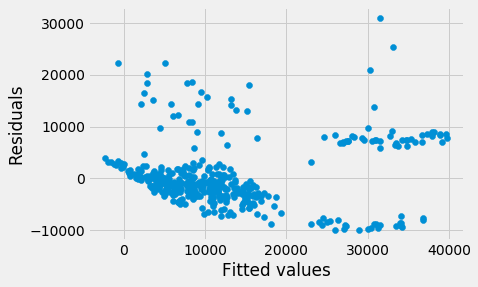

In [34]:
plt.scatter(l_reg_pred, (y_test-l_reg_pred))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

This plot shows a similar pattern of residuals as the previous plot.  

### Polynomial regression with SVR
Create the SVR object. 

In [35]:
svr_poly = SVR(kernel='poly', C=1, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

##### Fit SVR model

In [36]:
svr_poly.fit(X_train, y_train)

SVR(C=1, cache_size=200, coef0=1, degree=3, epsilon=0.1, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

##### SVR Predictions
Validate the model by predicting on the test set and retreiving the accuracy score.

In [37]:
svr_pred = svr_poly.predict(X_test)

print("Accuracy (R^2): {}%2f".format(svr_poly.score(X_test, y_test) * 100 ))


Accuracy (R^2): 81.02027862274947%2f


### Linear Regression with statsmodels
Code from: https://datatofish.com/multiple-linear-regression-python/  

Create the model object, fit and make predictions on the test set.  
The statsmodel library offers a 'summary' of fit models which automatically calculates numerous metrics for validation, scoring, etc.

In [38]:
# with statsmodels
#X = sm.add_constant(X_test) # adding a constant
 
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     356.1
Date:                Tue, 16 Jun 2020   Prob (F-statistic):          1.95e-276
Time:                        09:00:02   Log-Likelihood:                -9465.4
No. Observations:                 935   AIC:                         1.895e+04
Df Residuals:                     926   BIC:                         1.899e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                266.2324     14.170  

R^2 is 75.5%.  
Durbin-Watson tests for autocorrelation in the residuals.  The model returned 1.95.
A value of 2.0 means there is no autocorrelation detected in the data. 
Values from zero to 2.0 indicate positive autocorrelation and values from 2.0 to 4.0 indicate negative autocorrelation.

Get the residuals.

In [39]:
sms_residuals = model.resid

#### Check normality of residuals
A QQ plot will be used to assess the distribution of the residual errors.  This is useful in identifying problems with the distribution of the data which may impact the model.

In [40]:
import seaborn_qqplot as sqp

##### statsmodels qqplot

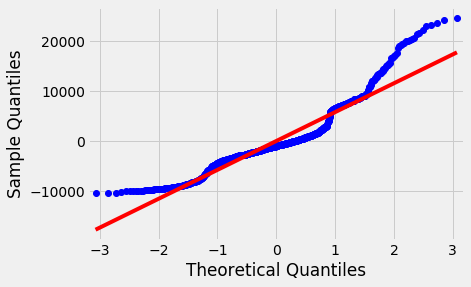

In [41]:
fig = sm.qqplot(sms_residuals, line = 'r')

Normally distributed data will produce a plot of point that aligns with the red line in the QQ plot.  Deviation from the red line indicates that the data is not normally distributed.  
One assumption of linear regression modeling is that the data is normally distributed.  The data in this project is not normally distributed which will negatively impact a linear regression model.

#### Feature Importance - Permutation
The relative importance of the features as determined by the SVR model will be assessed.  

In [42]:
from sklearn.inspection import permutation_importance

The model is refit using the test data and the importance of features is performed.

In [43]:
perm_importance = permutation_importance(svr_poly, X_test, svr_pred, scoring='neg_mean_squared_error')

The importance score is retrieved and displayed for each feature.

In [44]:
importance = perm_importance.importances_mean
for i, score in enumerate(importance, start=1):
    print('Feature: %0d, Score: %.5f' % (i, score))

Feature: 1, Score: 29144241.72786
Feature: 2, Score: 31843093.03423
Feature: 3, Score: 893588.90618
Feature: 4, Score: 526540.19187
Feature: 5, Score: 213289.63363
Feature: 6, Score: 48317859.80809
Feature: 7, Score: 61368858.44968
Feature: 8, Score: 229674.36083
Feature: 9, Score: 81380.25970
Feature: 10, Score: 15915.97826
Feature: 11, Score: 18658.62123


Get the feature names and redisplay with actual names.

In [45]:
x_names = X_test.columns
scores_df = pd.DataFrame(x_names)
scores_df['importance_score'] = importance

In [46]:
print(x_names)
scores_df.head(11)

Index(['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')


,0,importance_score
0,age,2.914424e+07
1,bmi,3.184309e+07
2,children,8.935889e+05
3,sex_female,5.265402e+05
4,sex_male,2.132896e+05
5,smoker_no,4.831786e+07
6,smoker_yes,6.136886e+07
7,region_northeast,2.296744e+05
8,region_northwest,8.138026e+04
9,region_southeast,1.591598e+04


In [47]:
scores_df.rename(columns={0:'Feature'})

,Feature,importance_score
0,age,2.914424e+07
1,bmi,3.184309e+07
2,children,8.935889e+05
3,sex_female,5.265402e+05
4,sex_male,2.132896e+05
5,smoker_no,4.831786e+07
6,smoker_yes,6.136886e+07
7,region_northeast,2.296744e+05
8,region_northwest,8.138026e+04
9,region_southeast,1.591598e+04


#### Feature Importance Plot

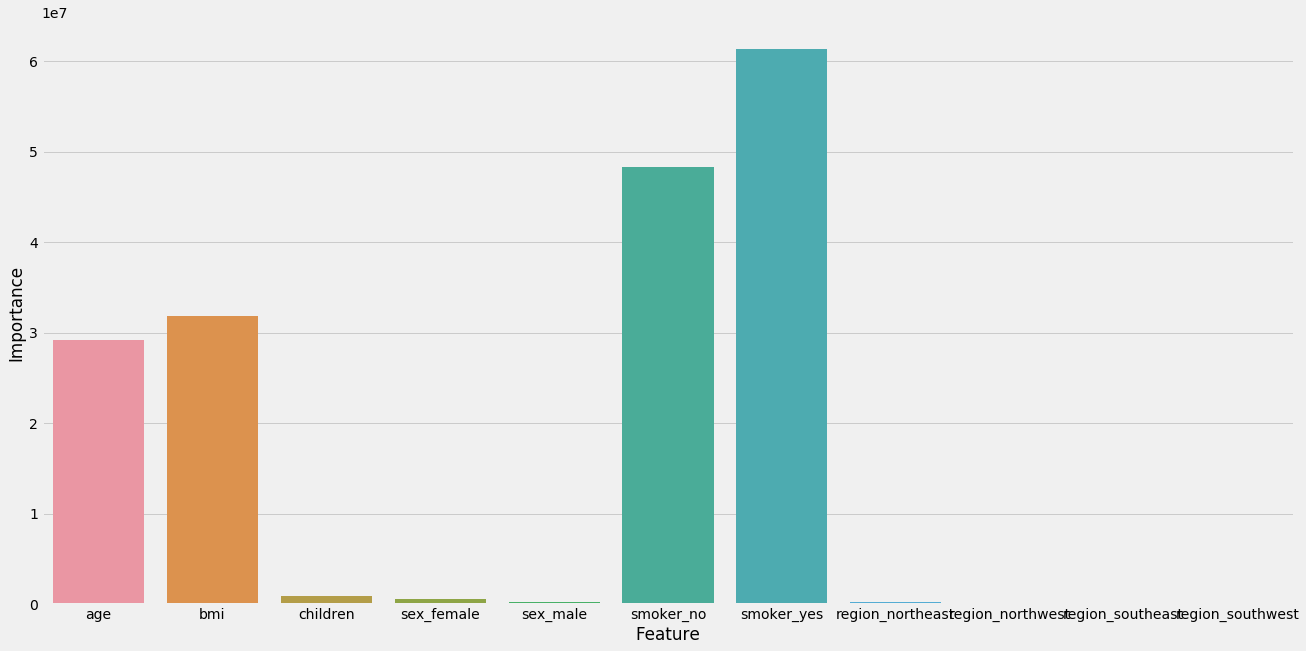

In [48]:
plt.figure(figsize=(20,10))
importance_plot = sns.barplot(x=0, y="importance_score", data=scores_df, )

importance_plot.set(xlabel='Feature', ylabel='Importance')

plt.show()

### Conclusion
The accuracy results of the three regression models somewhat low, with the SVR producing the best result.  
 - Model 1 (scikit-learn): 73.67%
 - Model 2 (SVR): 81.02%
 - Model 3 (statsmodel): 75.5%  
   
Additional engineering of the data may raise these scores, however, it is not recommeded.  
Analysis of the fit models residuals as well as information discovered the EDA process indicate that the data set used in this project violates assumptions of linear regression modeling.  Other predictive models that our more appropriate for the data should be explored.  
  
  As for feature importance, based on the SVR model the two 'smoker' features are the most important followed by 'bmi' and 'age'.  The remaining features are minimally important.